In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
path="./data/"
train_data = pd.read_csv(path + "train.csv", engine='python')

In [12]:
train_data.drop(['Date', 'stations'], axis=1, inplace=True)

In [15]:
column = train_data['observation'].unique()

In [36]:
# new_dataform
rows = 24*240
new_train_data = pd.DataFrame(np.zeros([rows, column.shape[0]]), columns=column)

In [37]:
for i in column:
    train_data1 = train_data[train_data['observation'] == i]
    # Be careful with the inplace, as it destroys any data that is dropped!
    train_data1.drop(['observation'], axis=1, inplace=True)
    train_data1 = np.array(train_data1)
    train_data1[train_data1 == 'NR'] = '0'
    train_data1 = train_data1.astype('float')
    train_data1 = train_data1.reshape(1, rows)
    train_data1 = train_data1.T
    new_train_data[i] = train_data1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [55]:
new_train_data

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,14.0,1.8,0.51,0.20,0.9,16.0,17.0,16.0,56.0,26.0,0.0,77.0,1.8,2.0,37.0,35.0,1.4,0.5
1,14.0,1.8,0.41,0.15,0.6,9.2,9.8,30.0,50.0,39.0,0.0,68.0,2.0,2.0,80.0,79.0,1.8,0.9
2,14.0,1.8,0.39,0.13,0.5,8.2,8.7,27.0,48.0,36.0,0.0,67.0,1.7,2.0,57.0,2.4,1.0,0.6
3,13.0,1.8,0.37,0.12,1.7,6.9,8.6,23.0,35.0,35.0,0.0,74.0,1.6,1.9,76.0,55.0,0.6,0.3
4,12.0,1.8,0.35,0.11,1.8,6.8,8.5,24.0,25.0,31.0,0.0,72.0,1.9,1.9,110.0,94.0,1.7,0.6
5,12.0,1.8,0.30,0.06,1.5,3.8,5.3,28.0,12.0,28.0,0.0,73.0,1.4,1.8,106.0,116.0,2.5,1.9
6,12.0,1.8,0.37,0.10,1.9,6.9,8.8,24.0,4.0,25.0,0.0,74.0,1.5,1.9,101.0,106.0,2.5,2.0
7,12.0,1.8,0.47,0.13,2.2,7.8,9.9,22.0,2.0,20.0,0.0,73.0,1.6,1.9,104.0,94.0,2.0,2.0
8,15.0,1.8,0.78,0.26,6.6,15.0,22.0,21.0,11.0,19.0,0.0,66.0,5.1,2.1,124.0,232.0,0.6,0.5
9,17.0,1.8,0.74,0.23,7.9,21.0,29.0,29.0,38.0,30.0,0.0,56.0,15.0,2.0,46.0,153.0,0.8,0.3


In [42]:
label = np.array(new_train_data['PM2.5'][9:], dtype='float32')

In [50]:
new_train_data['PM2.5'][9:]

9       30.0
10      41.0
11      44.0
12      33.0
13      37.0
14      36.0
15      45.0
16      42.0
17      49.0
18      45.0
19      44.0
20      41.0
21      30.0
22      24.0
23      13.0
24      21.0
25      23.0
26      30.0
27      30.0
28      22.0
29      18.0
30      13.0
31      13.0
32      11.0
33      22.0
34      25.0
35      34.0
36      38.0
37      50.0
38      53.0
        ... 
5730    25.0
5731    19.0
5732    11.0
5733     0.0
5734     7.0
5735     7.0
5736     6.0
5737     1.0
5738     1.0
5739     1.0
5740     0.0
5741     0.0
5742     0.0
5743     2.0
5744     2.0
5745     8.0
5746     8.0
5747    10.0
5748     4.0
5749     1.0
5750     1.0
5751     7.0
5752    24.0
5753    37.0
5754    49.0
5755    37.0
5756    28.0
5757    17.0
5758    24.0
5759    29.0
Name: PM2.5, Length: 5751, dtype: float64

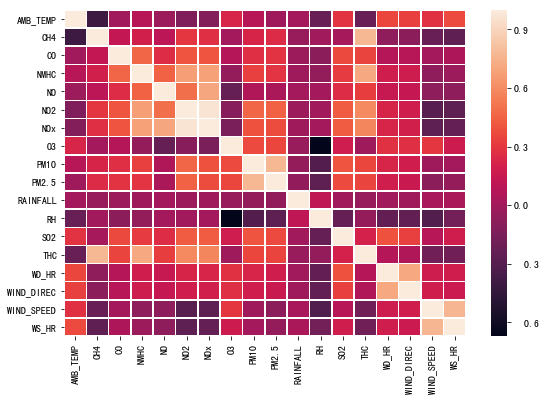

In [44]:
#熱力圖分析指標關係
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(new_train_data.corr(), fmt="d", linewidths=0.5, ax=ax)
plt.show()

In [45]:
#線性回歸模型
PM = new_train_data['PM2.5']   #僅出PM2.5
PM_mean = int(PM.mean())       #算出PM2.5 平均值
PM_theta = int(PM.var()**0.5)  #PM2.5 變異數
PM = (PM - PM_mean) / PM_theta  #(PM2.5值-總平均值）/變異數

In [51]:
w = np.random.rand(1, 10)
theta = 0.1
m = len(label)
for i in range(100):
    loss = 0   #
    i += 1
    gradient = 0  #梯度
    for j in range(m):
        x = np.array(PM[j : j + 9])
        x = np.insert(x, 0, 1)
        error = label[j] - np.matmul(w, x)
        loss += error**2
        gradient += error * x

    loss = loss/(2*m)
    #print(loss)
    w = w+theta*gradient/m

    

[[2.70485432 0.94458713 1.40714432 1.07382483 0.94012619 0.98572501
  1.43958602 1.52160467 1.8170035  1.37094938]]
[[4.54583774 0.91156957 1.37203924 1.06086596 0.97231303 1.07876263
  1.6150754  1.79607674 2.32285087 2.11209094]]
[[6.19836078 0.78021684 1.23017427 0.93058011 0.87445377 1.02767568
  1.63186806 1.89730067 2.64822467 2.67601771]]
[[7.68449039 0.64207825 1.08021263 0.78751751 0.7553564  0.94422965
  1.60293696 1.93753124 2.90140435 3.16408168]]
[[9.0217076  0.5185044  0.94531033 0.65676645 0.64210077 0.85746053
  1.55896331 1.9485352  3.11390581 3.60617369]]
[[10.22512045  0.41275681  0.82914197  0.54283312  0.54046124  0.77467262
   1.50883953  1.94061308  3.29667259  4.0129939 ]]
[[11.30816248  0.32366171  0.73058426  0.44508426  0.45077255  0.69747719
   1.45560014  1.91815955  3.45490218  4.38984801]]
[[12.28288141  0.24915772  0.64753431  0.3617726   0.3720816   0.62600862
   1.40062888  1.88378963  3.59198812  4.74031962]]
[[13.16010955  0.18719154  0.57787642  0.2

[[ 2.09995198e+01 -4.17194342e-02  3.04847943e-01  6.81973804e-02
  -1.72793435e-02  1.35540341e-01  3.94980629e-01 -1.71947239e+00
   3.69679648e+00  1.15401135e+01]]
[[ 2.10038712e+01 -4.26511164e-02  3.03978321e-01  6.94593877e-02
  -1.60460751e-02  1.45212608e-01  4.04861412e-01 -1.77430083e+00
   3.67403294e+00  1.16026175e+01]]
[[ 2.10077747e+01 -4.36032378e-02  3.03068215e-01  7.06211951e-02
  -1.50087602e-02  1.54939063e-01  4.15307716e-01 -1.82837277e+00
   3.65129184e+00  1.16639458e+01]]
[[ 2.10112754e+01 -4.45711624e-02  3.02123039e-01  7.16872620e-02
  -1.41690489e-02  1.64705593e-01  4.26295573e-01 -1.88170245e+00
   3.62858297e+00  1.17241328e+01]]
[[ 2.10144139e+01 -4.55505881e-02  3.01147956e-01  7.26620703e-02
  -1.35280969e-02  1.74499005e-01  4.37801953e-01 -1.93430385e+00
   3.60591538e+00  1.17832115e+01]]
[[ 2.10172268e+01 -4.65375385e-02  3.00147876e-01  7.35501024e-02
  -1.30866096e-02  1.84306970e-01  4.49804723e-01 -1.98619075e+00
   3.58329745e+00  1.1841213

In [ ]:
#==================================================================================

In [ ]:
#sklearn 

In [95]:
new_train=new_train_data[['PM10','NO2','SO2','NOx','O3','THC','PM2.5']]
#（24*240天) , 共有18種變數,但由上熱力表得知 PM2.5相關的指標有 PM10、NO2、SO2、NOX、O3、THC

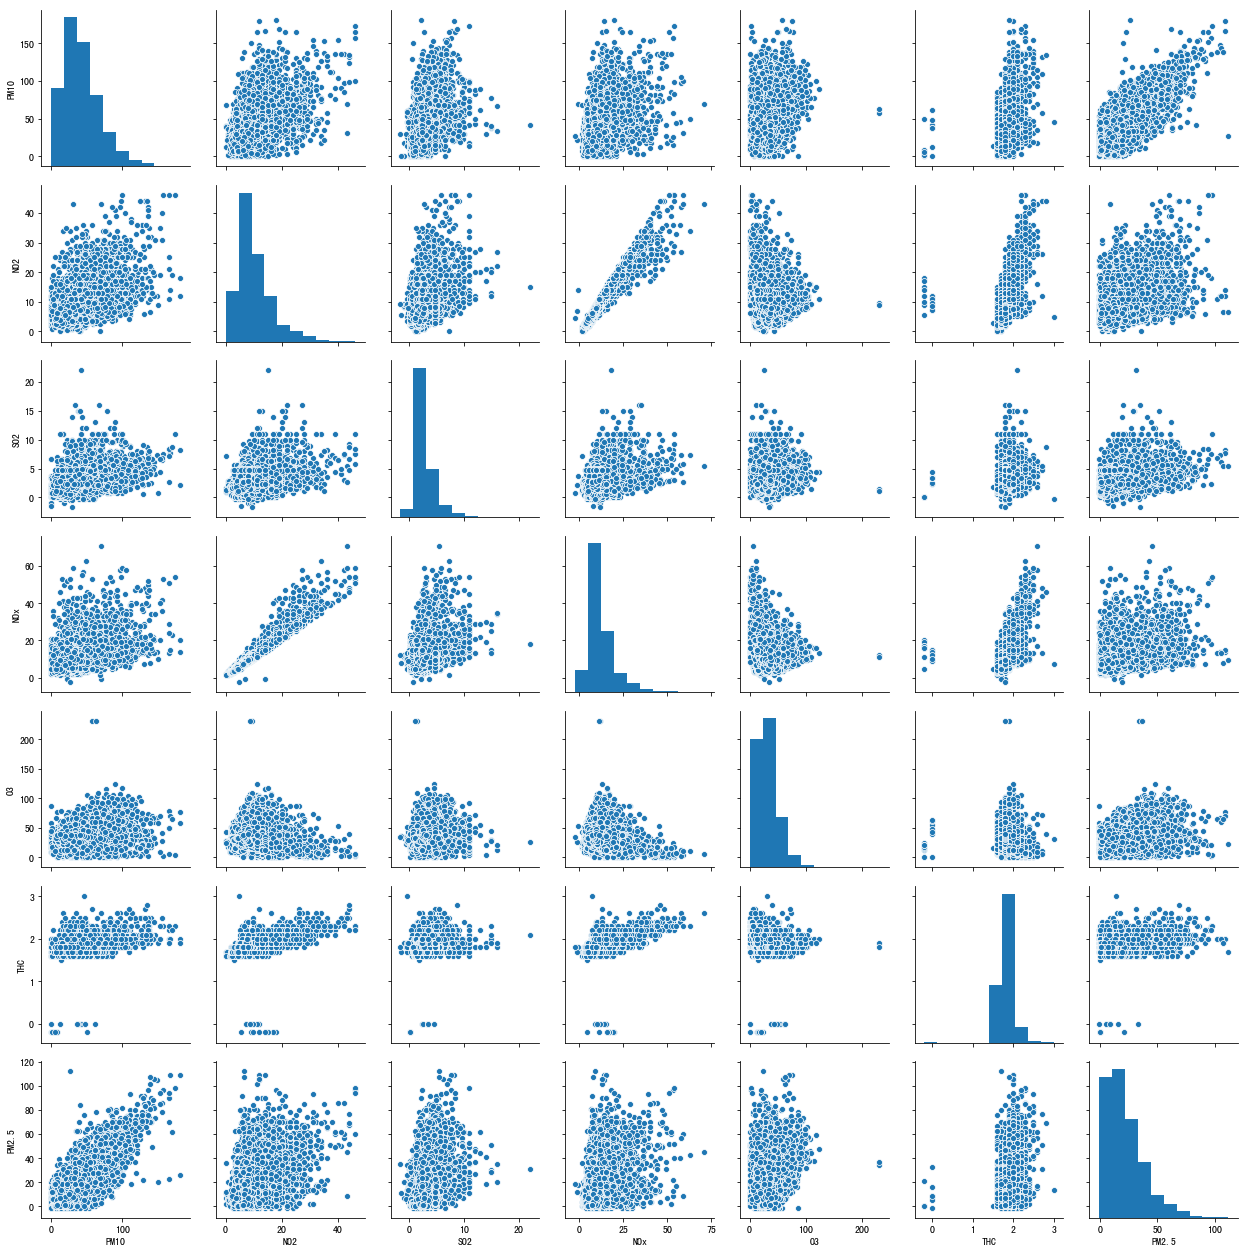

In [96]:
sns.pairplot(new_train)

In [71]:
X = new_train_data[['PM10','NO2','SO2','NOx','O3','THC']]
y = new_train_data[['PM2.5']]

In [73]:
#區分訓練及測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [79]:
#確認大小
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4320, 6) (4320, 1) (1440, 6) (1440, 1)


In [83]:
regr=LinearRegression()
#訓練模型 用fit
regr.fit(X_train,y_train)   
r_squared = regr.score(X_train, y_train)

In [88]:
print('intercept:',regr.intercept_) #截距
print('coefficient:',regr.coef_) #係數

intercept: [-11.40473008]
coefficient: [[ 0.39719862  1.07034102  0.28561565 -0.60496001  0.10744408  4.42269754]]


In [99]:
X_train.columns

Index(['PM10', 'NO2', 'SO2', 'NOx', 'O3', 'THC'], dtype='object')

In [100]:
regr.coef_

array([[ 0.39719862,  1.07034102,  0.28561565, -0.60496001,  0.10744408,
         4.42269754]])

In [89]:
predict_y=regr.predict(X_test)

Text(0.5, 0, 'Measured')

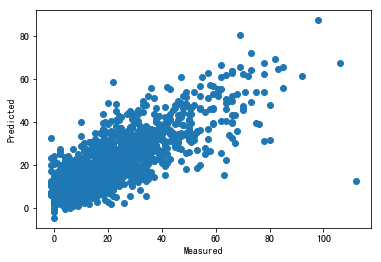

In [104]:
#比較實際及預測關係
plt.scatter(y_test,predict_y)
plt.ylabel('Predicted')
plt.xlabel('Measured')

In [106]:
#載入迴歸常見的評估指標
from sklearn import metrics

#Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
metrics.mean_absolute_error(y_test,predict_y)


7.818121257068143

In [107]:

#Mean Squared Error (MSE)比起MSE可以拉開誤差差距，算是蠻常用的指標，公式所有實際值及預測值相減的平方的平均
metrics.mean_squared_error(y_test,predict_y)


111.75451096686581

In [108]:

#Root Mean Squared Error (RMSE)代表MSE的平方根。比起MSE更為常用，因為更容易解釋y。
np.sqrt(metrics.mean_squared_error(y_test,predict_y))

10.571400615191244